In [1]:
#data klasöründen verilerin okunması ve
#egitim_X[] içerisine kaydedilmesi
import os
 
#Text dosyaları data isimli klasör içerisinde olsun
BASE_DIR = os.getcwd()
TEXT_DATA_DIR = os.path.join(BASE_DIR, 'data')

In [7]:
egitim_X = []
#data klasöründeki tüm dosyaları teker teker oku
for name in sorted(os.listdir(TEXT_DATA_DIR)):
    fname = os.path.join(TEXT_DATA_DIR, name)
    #dosya uzantısı .txt ise 
    if fname.endswith("istiklalmarsi.txt"):
        with open(fname,encoding="UTF-8") as infile:
            for line in infile:
                #satır başı ve sonu dışındaki olası boşlukları temizle
                line = line.strip()
                try:
                  egitim_X.append(line)
                except Exception as e:
                  print(e)

In [10]:
#ilk ve son satırları yazdır
print(egitim_X[0])
print(egitim_X[-1])

Korkma, sönmez bu şafaklarda yüzen al sancak;
"Medeniyet!" dediğin tek dişi kalmış canavar?


In [11]:
#veri sayısını yazdır
print(len(egitim_X))

16


In [12]:
from keras.preprocessing.text import Tokenizer
 
# tokinizer nesnesini oluştur
 
# parametres opsiyonları ve default değerleri
# num_words=None, lower=True, split=' '
# filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~ '
 

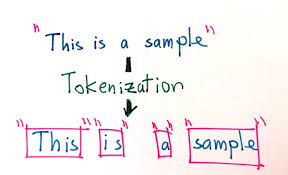

In [13]:
#Import library
from IPython.display import Image
Image(filename = "data/tokenize.jpg", width = 300)

In [14]:
# metinlerde en çok geçen 20 kelimenin işleme alınmasını sağlayalım
MAX_NUM_WORDS = 20
tokenizer = Tokenizer(num_words=MAX_NUM_WORDS)

# giriş verisine göre tokinizer sınıfının ayarlanması
tokenizer.fit_on_texts(egitim_X)

##tokinizer giriş verisiyle ilgili bilmesi gereken bir çok şeyi biliyor
#kelime listesi , kelime frekansları , en fazla geçen 20 kelime gibi

In [15]:
#hangi kelimelerin geçtiğine bakalım
for kelime in tokenizer.word_index:
    print(kelime)

bu
o
benim
korkma
milletimin
bir
hür
sönmez
şafaklarda
yüzen
al
sancak
sönmeden
yurdumun
üstünde
tüten
en
son
ocak
yıldızıdır
parlayacak
benimdir
milletimindir
ancak
çatma
kurban
olayım
çehreni
ey
nazlı
hilâl
kahraman
ırkıma
gül…
ne
şiddet
celâl
sana
olmaz
dökülen
kanlarımız
sonra
helâl
hakkıdır
hakk’a
tapan
istiklâl
ben
ezelden
beridir
yaşadım
yaşarım
hangi
çılgın
bana
zincir
vuracakmış
şaşarım
kükremiş
sel
gibiyim
bendimi
çiğner
aşarım
yırtarım
dağları
enginlere
sığmam
taşarım
garb’ın
âfâkını
sarmışsa
çelik
zırhlı
duvar
iman
dolu
göğsüm
gibi
serhaddim
var
ulusun
nasıl
böyle
îmânı
boğar
medeniyet
dediğin
tek
dişi
kalmış
canavar


In [16]:
print("Toplam ", len(tokenizer.word_index), " adet farklı kelime bulunmaktadır")
print("Toplam ", tokenizer.num_words, " adet  kelime işleme alınacaktır")

Toplam  92  adet farklı kelime bulunmaktadır
Toplam  20  adet  kelime işleme alınacaktır


In [17]:
#bütün kelimeleri ve frekanslarını yazdıralım
for kelime in tokenizer.word_index:
    print(kelime, "=", tokenizer.word_counts[kelime], "    ",)

bu = 3     
o = 3     
benim = 3     
korkma = 2     
milletimin = 2     
bir = 2     
hür = 2     
sönmez = 1     
şafaklarda = 1     
yüzen = 1     
al = 1     
sancak = 1     
sönmeden = 1     
yurdumun = 1     
üstünde = 1     
tüten = 1     
en = 1     
son = 1     
ocak = 1     
yıldızıdır = 1     
parlayacak = 1     
benimdir = 1     
milletimindir = 1     
ancak = 1     
çatma = 1     
kurban = 1     
olayım = 1     
çehreni = 1     
ey = 1     
nazlı = 1     
hilâl = 1     
kahraman = 1     
ırkıma = 1     
gül… = 1     
ne = 1     
şiddet = 1     
celâl = 1     
sana = 1     
olmaz = 1     
dökülen = 1     
kanlarımız = 1     
sonra = 1     
helâl = 1     
hakkıdır = 1     
hakk’a = 1     
tapan = 1     
istiklâl = 1     
ben = 1     
ezelden = 1     
beridir = 1     
yaşadım = 1     
yaşarım = 1     
hangi = 1     
çılgın = 1     
bana = 1     
zincir = 1     
vuracakmış = 1     
şaşarım = 1     
kükremiş = 1     
sel = 1     
gibiyim = 1     
bendimi = 1     
çiğner = 1    

In [18]:
#Bu aşamaya kadar gerçekleştirilen bütün adımlar, 
#giriş verisinin sayısal veriler olarak temsil edilmesi içindi. Şimdi bunu gerçekleştirelim:

sequences = tokenizer.texts_to_sequences(egitim_X)

for satir in sequences:
    print(satir, "  ",)

[4, 8, 1, 9, 10, 11, 12]   
[13, 14, 15, 16, 17, 18, 19]   
[2, 3, 5]   
[2, 2, 3]   
[]   
[6, 1, 1]   
[]   
[5]   
[7, 7]   
[]   
[]   
[]   
[]   
[3]   
[4, 6]   
[]   


In [19]:
#Veriler artık cümleler yerine sayısal değerler ifade edilmiş
#Fakat önemli eksikler var
#Bazı cümlelerin [] şeklinde boş dizilere dönüştüğünü görüyoruz
#Genellik tamamen boş diziyle karşılaşmak burdakindan daha nadir gerçekleşir. 
#Çünki en azından en çok geçen 10.000 kelime’den birkaçı bir veride bulunması beklenir. 
#Fakat bu örnekte, verileri manuel olarak takip edebilmemiz açısından az sayıda veri kullanıldı
#maksimum kelime sayısı 20 seçildi.
#Ayrıca görüldüğü üzere her veri farklı uzunlukta. 
#Çoğu algoritma giriş verilerinin sabit uzunlukta olmasını bekler. 
#Bu durumlarda tokenizer’ın padding metodunu kullanırız.

In [23]:
# her bir giriş verisininin uzunluğu yalnızca 4 olsun
from keras.utils import pad_sequences
 
giris = pad_sequences(sequences, maxlen=4)
for satir in giris:
    print(satir, "  ",)

[ 9 10 11 12]   
[16 17 18 19]   
[0 2 3 5]   
[0 2 2 3]   
[0 0 0 0]   
[0 6 1 1]   
[0 0 0 0]   
[0 0 0 5]   
[0 0 7 7]   
[0 0 0 0]   
[0 0 0 0]   
[0 0 0 0]   
[0 0 0 0]   
[0 0 0 3]   
[0 0 4 6]   
[0 0 0 0]   
